## Fig S7: Optimal mutation rate as a function of transcription factor copy numbers and wild-type binding energies

Required packages:

In [1]:
# processing
import numpy as np
import scipy.optimize

# visualization
import matplotlib.pyplot as plt
from tregs.mpl_pboc import plotting_style

plt.rcParams.update({'font.size': 12})
plotting_style()

fdir = '../data/'
out_fdir = '../plots/figS7/'

To calculate the optimal mutation rate for a promoter with the simple repression regulatory architecture, we define the following functions with the expression for $\kappa$, the ratio between the Boltzmann weight of the repressor binding state and that of the RNAP binding site

In [2]:
def simple_repression(
    m,
    epsilon_R,
    epsilon_P,
    delta_epsilon_R,
    delta_epsilon_P,
    R,
    P,
    l_R,
    l_P):
  return R/P * np.exp(-(epsilon_R + m * l_R * delta_epsilon_R)) / np.exp(-(epsilon_P + m * l_P * delta_epsilon_P))

def simple_repression_zero(
    m,
    epsilon_R,
    epsilon_P,
    delta_epsilon_R,
    delta_epsilon_P,
    R,
    P,
    l_R,
    l_P):
  return simple_repression(m, epsilon_R, epsilon_P, delta_epsilon_R, delta_epsilon_P, R, P, l_R, l_P) - 1

We initialize the following figure for plotting the heatmap of optimal mutation rates under different parameter pairs

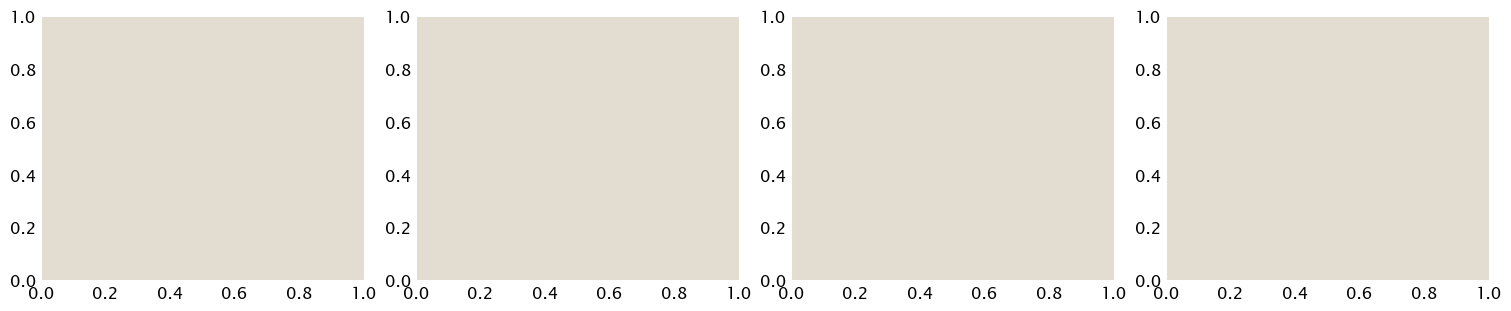

In [3]:
fig, ax = plt.subplots(1, 4, figsize=(15, 3), layout='compressed')

Plotting the heatmap of optimal mutation rates under different copy number of RNAP and repressors

In [4]:
R_range = np.logspace(0, 4, 500)
P_range = np.logspace(0, 5, 500)
z =  -1 * np.ones([len(R_range), len(P_range)])
for i, R in enumerate(R_range):
  for j, P in enumerate(P_range):
    if simple_repression(0, -15, -5, 2.24, 0.36, R, P, 20, 20) > 1:
      x, r = scipy.optimize.brentq(simple_repression_zero, 0, 1, args=(-15, -5, 2.24, 0.36, R, P, 20, 20), full_output=1, disp=False)
      if r.converged:
        z[i, j] = x

cset = ax[0].contourf(P_range, R_range, z, origin="lower", extent=(1, P_range.max(), 1, R_range.max()),
                      levels=[-0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55])

ax[0].set_ylabel("R")
ax[0].set_xlabel("P")

ax[0].set_ylim(R_range.min(), R_range.max())
ax[0].set_xlim(P_range.min(), P_range.max())
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].scatter([5000], [10], marker='x',color='white')
ax[0].grid(False)

Plotting the heatmap of optimal mutation rates under different wild-type binding energies of RNAP and repressors

In [5]:
epsilon_R_range = np.linspace(-20, -12, 100)
epsilon_P_range = np.linspace(-10, -3, 100)
z =  -1 * np.ones([len(epsilon_R_range), len(epsilon_P_range)])
for i, epsilon_R in enumerate(epsilon_R_range):
  for j, epsilon_P in enumerate(epsilon_P_range):
    if simple_repression(0, epsilon_R, epsilon_P, 2.24, 0.36, 10, 5000, 20, 20) > 1:
      x, r = scipy.optimize.brentq(simple_repression_zero, 0, 1, args=(epsilon_R, epsilon_P, 2.24, 0.36, 10, 5000, 20, 20), disp=False, full_output=1)
      if r.converged:
        z[i, j] = x

cset = ax[1].contourf(epsilon_P_range, epsilon_R_range, z, origin="lower", extent=(epsilon_P_range.min(), epsilon_P_range.max(), epsilon_R_range.min(), epsilon_R_range.max()), levels=[-0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55])

ax[1].set_ylabel(r"$\Delta\varepsilon_\mathrm{rd}\:(k_BT)$")
ax[1].set_xlabel(r"$\Delta\varepsilon_\mathrm{pd}\:(k_BT)$")
ax[1].scatter([-5], [-15], marker='x',color='white')
ax[1].grid(False)

Plotting the heatmap of optimal mutation rates under different copy numbers and wild-type binding energies of the repressor

In [6]:
z =  -1 * np.ones([len(epsilon_R_range), len(R_range)])
for i, epsilon_R in enumerate(epsilon_R_range):
  for j, R in enumerate(R_range):
    if simple_repression(0, epsilon_R, -5, 2.24, 0.36, R, 5000, 20, 20) > 1:
      x, r = scipy.optimize.brentq(simple_repression_zero, 0, 1, args=(epsilon_R, -5, 2.24, 0.36, R, 5000, 20, 20), full_output=True, disp=False)
      if r.converged:
        z[i, j] = x

cset = ax[2].contourf(R_range, epsilon_R_range, z, origin="lower", extent=(1, R_range.max(), epsilon_R_range.min(), epsilon_R_range.max()), levels=[-0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55])

ax[2].set_ylabel(r"$\Delta\varepsilon_\mathrm{rd}\:(k_BT)$")
ax[2].set_xlabel("R")
ax[2].set_xscale('log')
ax[2].scatter([10], [-15], marker='x',color='white')
ax[2].grid(False)

Plotting the heatmap of optimal mutation rates under different copy numbers and wild-type binding energies of the RNAP

In [7]:
z = -1 * np.ones([len(epsilon_P_range), len(P_range)])
for i, epsilon_P in enumerate(epsilon_P_range):
  for j, P in enumerate(P_range):
    if simple_repression(0, -15, epsilon_P, 2.24, 0.36, 10, P, 20, 20) > 1:
      x, r = scipy.optimize.brentq(simple_repression_zero, 0, 1, args=(-15, epsilon_P, 2.24, 0.36, 10, P, 20, 20), full_output=True, disp=False)
      if r.converged:
        z[i, j] = x

cset = ax[3].contourf(P_range, epsilon_P_range, z, origin="lower", extent=(P_range.min(), P_range.max(), epsilon_P_range.min(), epsilon_P_range.max()), levels=[-0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55])

ax[3].set_ylabel(r"$\Delta\varepsilon_\mathrm{pd}\:(k_BT)$")
ax[3].set_xlabel("P")
ax[3].set_xscale('log')
ax[3].scatter([5000], [-5], marker='x',color='white')
ax[3].grid(False)

Adding a color bar to the heatmaps and visualize the figure

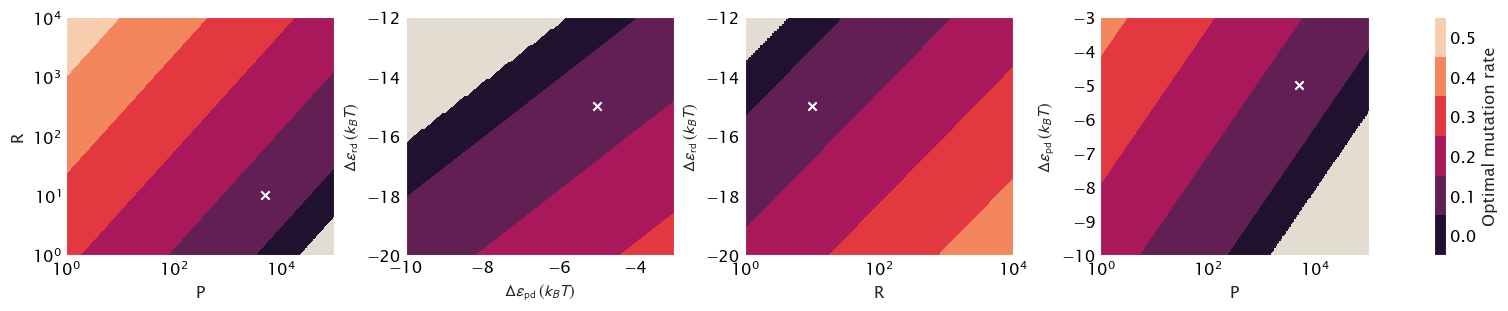

In [8]:
cbar = fig.colorbar(cset, ax=ax, label='Optimal mutation rate', )
cbar.ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
cbar.ax.set_position([0.77, 0.01, 0.02, 1])  # [left, bottom, width, height]

fig.savefig(out_fdir + "opt_mut_rate.pdf")

fig